<a href="https://colab.research.google.com/github/doushenyiyezhiqiu/CS5100_Assignments/blob/main/GoogleMap_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview of Assignment**

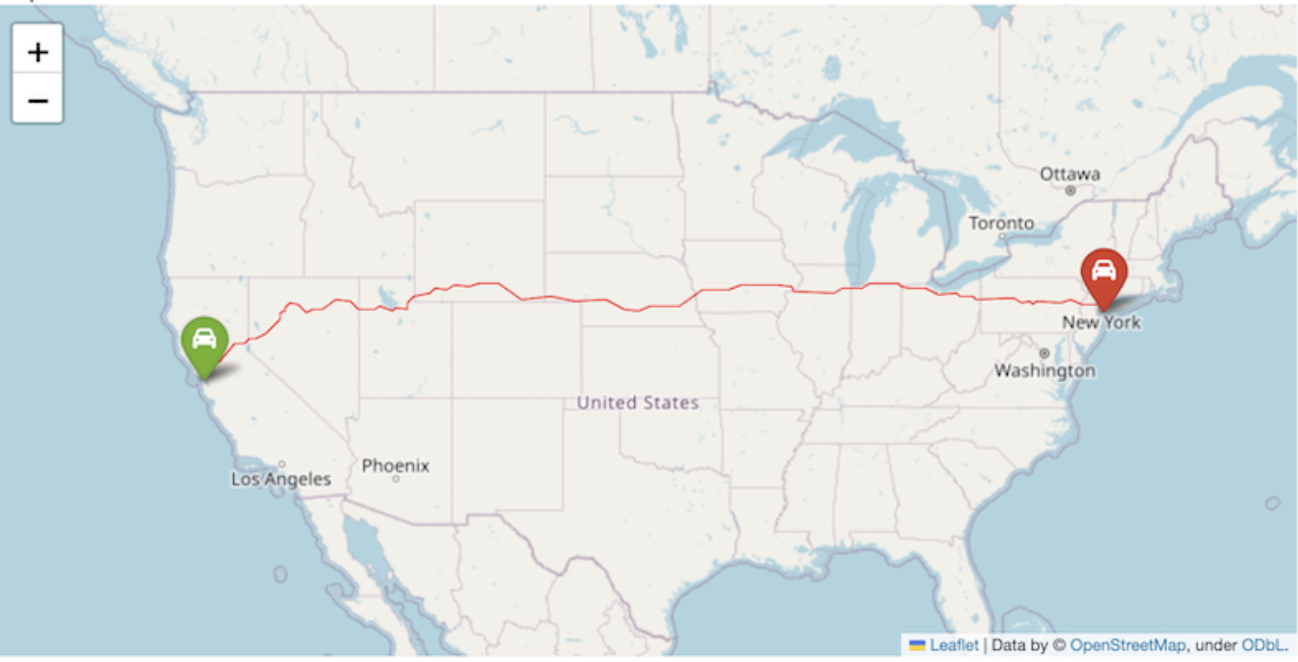


This assignment focuses on demonstrating how to find and visualize the shortest path between cities using graph theory, pathfinding algorithms, and data visualization techniques. By modeling cities as nodes and their connections (roads) as edges in a graph, the task introduces students to fundamental concepts in computer science, such as graph representation and traversal. A shortest path algorithm is utilized to explore the shortest route between two cities in an unweighted graph, making it a practical choice for basic pathfinding scenarios without varying weights, like road distances or travel times.The assignment integrates geospatial data visualization using tools like Folium and NetworkX, allowing students to create interactive maps and graph diagrams that depict the cities and their connections visually. Folium is used to create an engaging map where cities are marked as points of interest, making the visualization of geographical data more accessible and intuitive. NetworkX, on the other hand, handles the underlying graph structure and Shortet Path implementation, providing a clear picture of how algorithms work in real-world contexts.

Additionally, the geopy library is used to calculate the geodesic distance between cities along thedetermined path, showcasing practical applications of mathematics and geography in computer science. This approach highlights the multidisciplinary nature of modern data analysis, where coding skills, mathematical understanding, and geographical knowledge intersect. The combination of interactive visualization and algorithmic problem-solving provides hands-on experience, reinforcing the theoretical concepts with practical coding applications.Overall, this assignment serves to bridge theoretical concepts with practical applications, making it ideal for students and professionals interested in learning about data visualization, pathfinding algorithms, and geospatial analysis. It emphasizes the importance of computational methods in solving real-world challenges such as navigation, urban planning, and logistics, while providing a comprehensive learning experience that integrates multiple fields of study.



# **Plot the cities on an interactive map**

In this assignment, we use Folium, an interactive map library, which is a Python library that allows you to create interactive maps based on the popular Leaflet javascript library.

1.   More information on Folium: https://python-visualization.github.io/folium/latest/

2.  More information on Leaflet: https://leafletjs.com/


In [11]:
# Getting Started
!pip install folium

# Additional Packages are required for dependencies.

In [5]:
# Creating a Map
import folium

m = folium.Map(location=(43.6591, -70.2568))
m

In [6]:
import folium

m = folium.Map(location=(37.7749, -122.4194))
m

In [7]:
import folium

m = folium.Map(location=(40.661, -73.944))
m

In [13]:
import folium

folium.Marker(san_francisco, popup='San Francisco').add_to(m)
folium.Marker(new_york, popup='New York').add_to(m)
m

The markers can be customized to have a different color or icons. You can check the folium.map.Icon class for options for creating icons. This class supports a vast range of icons from the fontawesome icons and bootstrap icons libraries. You can choose the name of the icon from there to use it in your Folium map. The prefix parameter can be fa for FontAwesome icons or glyphicon for Bootstrap3.

In [16]:
from folium import Figure
fig = Figure(width=800, height=400)
m = folium.Map(location=[39.83, -98.58], zoom_start=4)
folium.Marker(san_francisco, popup='San Francisco',
              icon=folium.Icon(
                  color='green', icon='crosshairs', prefix='fa')
             ).add_to(m)
folium.Marker(new_york, popup='New York',
              icon=folium.Icon(color='red', icon='crosshairs', prefix='fa')
             ).add_to(m)
fig.add_child(m)

Vectors such as lines
Folium has various vector elements. One example is PolyLine, which can show linear elements on a map. This object can help put emphasis on a trail, a road, or a coastline.

In [14]:
m = folium.Map(location=[-71.38, -73.9], zoom_start=11)

trail_coordinates = [
    (-71.351871840295871, -73.655963711222626),
    (-71.374144382613707, -73.719861619751498),
    (-71.391042575973145, -73.784922248007007),
    (-71.400964450973134, -73.851042243124397),
    (-71.402411391077322, -74.050048183880477),
]

folium.PolyLine(trail_coordinates, tooltip="Coast").add_to(m)
m

Grouping and controlling: You can group multiple elements such as markers together in a FeatureGroup. You can select which you want to show by adding a LayerControl to the map.

In [17]:
m = folium.Map((0, 0), zoom_start=7)

group_1 = folium.FeatureGroup("first group").add_to(m)
folium.Marker((0, 0), icon=folium.Icon("red")).add_to(group_1)
folium.Marker((1, 0), icon=folium.Icon("red")).add_to(group_1)

group_2 = folium.FeatureGroup("second group").add_to(m)
folium.Marker((0, 1), icon=folium.Icon("green")).add_to(group_2)

folium.LayerControl().add_to(m)

m

In [18]:
from folium import Figure
import folium # make sure to import folium

fig = Figure(width=800, height=400)
m = folium.Map(location=[39.83, -98.58], zoom_start=4) # add folium before Map
folium.Marker(san_francisco, popup='San Francisco',
              icon=folium.Icon(
                  color='green', icon='crosshairs', prefix='fa')
             ).add_to(m)
folium.Marker(new_york, popup='New York',
              icon=folium.Icon(color='red', icon='crosshairs', prefix='fa')
             ).add_to(m)
fig.add_child(m)


In [ ]:


# Step 2: Import Folium
import folium

# Step 3: Define coordinates for the cities
new_york_coords = [40.7128, -74.0060]  # New York
boston_coords = [42.3601, -71.0589]    # Boston

# Step 4: Create a Folium map centered between the two cities
m = folium.Map(location=[41.5365, -72.5325], zoom_start=7)

# Step 5: Add markers for each city
folium.Marker(new_york_coords, popup="New York", icon=folium.Icon(color='red', icon='crosshairs', prefix='fa')).add_to(m)
folium.Marker(boston_coords, popup="Boston", icon=folium.Icon(color='green', icon='crosshairs', prefix='fa')).add_to(m)

# Step 6: Add the first line between the two cities
folium.PolyLine(locations=[new_york_coords, boston_coords], color='blue', weight=5, opacity=0.7).add_to(m)

# Step 7: Add a second line with a slight variation in color or weight
folium.PolyLine(locations=[new_york_coords, boston_coords], color='red', weight=3, opacity=0.7).add_to(m)

# Step 8: Display the map
m


# **Exercise 1**

Can you create a map with following features:

1.   Create an interactive map of driving directions between Las Vegas, Nevada and New Orleans, Louisiana.
2.   Cutomize the marker icons to a car icon.
3. Change the route line to red color with a line width of 2 pixels.

# **Create a graph of cities using NetworkX**

NetworkX is a powerful Python library designed for the creation, manipulation, and analysis of complex networks and graphs. It allows users to build various types of graphs, whether they are undirected, directed, or even multi-graphs, which are graphs with multiple edges between nodes. In a typical use case, nodes can represent entities like cities, people, computers, or proteins, while edges can represent the relationships or connections between them. One of the most appealing aspects of NetworkX is its flexibility, allowing nodes and edges to carry extra information such as names, labels, or weights, which can be critical for solving real-world problems.

NetworkX comes with a wide range of graph algorithms that help in analyzing the structure and properties of graphs. These algorithms include methods for finding the shortest path, detecting cycles, identifying communities, and computing various centrality measures that help determine the importance of nodes in a network. For instance, centrality measures like betweenness and closeness centrality can be used to identify influential nodes in social networks or critical points in transportation systems. The library also supports algorithms for pathfinding, such as Dijkstra's or A*, making it ideal for routing and navigation applications.

One of the greatest advantages of NetworkX is its integration with other Python libraries, such as matplotlib for visualization and pandas for data analysis. This allows users to visualize networks and graph structures in a clear and insightful manner, making complex relationships easier to interpret. NetworkX is commonly used in various fields, including social network analysis, biology (e.g., protein interaction networks), and computer science (e.g., dependency graphs). Its versatility and ease of use make it an essential tool for researchers and developers who need to model, analyze, and visualize complex network data.
*Note*: NetworkX requires Python 3.10, 3.11, or 3.12.

For more details, please refer to: https://networkx.org/documentation/stable/install.html



# **Exercise 2**

Can you write a python code to find and list all possible paths between two cities in a transportation network using NetworkX between two cities like portland maine and los angeles califiornia?

You can use routes as:

*   'Portland, Maine' to 'New York, NY'
*   'New York, NY' to 'Chicago, IL'
*   'Chicago, IL' to 'Los Angeles, CA'
*   'Portland, Maine' to 'Chicago, IL'
*   'New York, NY' to 'Los Angeles, CA'


# **Perform an algorithm find the shortest path**

**Recommended algorithm**:

Dijkstra's Algorithm is a popular algorithm used to find the shortest path between nodes in a graph. It is particularly useful for graphs where the edges between nodes have weights, such as distances, costs, or times. This algorithm guarantees that you can find the shortest path from a starting node to a target node or to all other nodes in the graph.

*Key Concepts of Dijkstra's Algorithm:*


1.   Graph: A set of nodes (cities, for example) connected by edges (roads, flights, etc.), where each edge has a weight (distance, cost, etc.).
2.   Weights: The values associated with each edge. These can represent distances, travel times, or costs between the nodes.
3. Shortest Path: The path between two nodes such that the sum of the weights of the edges is minimized.


Steps of Dijkstra's Algorithm:

**Step 1:** Initialization:Start with a graph where each node has a tentative distance. Initially, the distance of the starting node is set to 0, and all other nodes are set to infinity (since they are not yet reached). The starting node is marked as the current node.

**Step 2**:Exploration:For the current node, consider all its neighboring nodes. For each neighboring node, calculate the tentative distance by summing the distance of the current node and the weight of the edge connecting the current node to the neighbor.

**Step 3**:If this newly calculated distance is less than the current known distance of the neighboring node, update the distance for that node.
Mark the Current Node as Visited:

**Step 4**:After examining all the neighbors, mark the current node as "visited." A visited node will not be checked again.

**Step 5**:Select the Next Node: Choose the unvisited node with the smallest known distance and make it the new current node.

**Step 6**:Repeat: Repeat steps 2-4 until all nodes have b

# **Visualize the graph using Matplotlib, highlighting the path**

To visualize the graph using Matplotlib, we first need to represent the cities and the connections (edges) between them as a graph, where nodes are cities and edges are the roads with their respective distances. We can use networkx, a library in Python designed for working with complex networks, to create and display this graph. The edges between the cities will be weighted, and Dijkstra's algorithm will be used to compute the shortest path from a starting city to the destination city. We'll also use Matplotlib to draw the graph, ensuring that the shortest path is clearly highlighted. For example, we could color the edges and nodes of the shortest path differently to visually distinguish it from the rest of the network.

In the visualization, the cities will be represented as nodes, and the roads between them will be drawn as edges with their respective distances. We can apply a color gradient or a different line style to the shortest path (e.g., red for the path and black for other edges). The node sizes can represent the importance or centrality of each city in the network, and the edge labels will show the distances between the cities. By highlighting the shortest path, the visualization allows us to easily see which cities the traveler would pass through on the shortest route from City A to City B, providing an intuitive representation of Dijkstra’s algorithm in action.


# **Exercise 3**


**Scenario: Optimal Road Trip Planner with shortest path Algorithm on Interactive map**

Imagine you're planning a road trip along the East Coast of the United States, starting from New York City and ending in Washington, D.C. You want to visit multiple cities, including Boston, Philadelphia, and Pittsburgh, and need to determine the shortest route between New York City and Washington, D.C., while ensuring that you pass through these cities. You have a predefined set of connections (roads) between these cities (like highways or major roads). In this case,you are not only looking for the shortest path in terms of the number of connections, but you also want to minimize the actual travel distance between cities.

Cities: New York, Boston, Philadelphia, Washington DC, Pittsburgh
Roads (Connections):

Road Distances (weights for each road/connection):


*   New York ↔ Boston: 340 km
*   New York ↔ Philadelphia: 150 km
*   Philadelphia ↔ Washington DC: 220 km
*   Philadelphia ↔ Pittsburgh: 490 km
*   Pittsburgh ↔ Washington DC: 390 km

**Objective:**
You need to find the shortest path between New York City and Washington, D.C. based on real road distances and calculate the total distance of the trip on interactive Map,folium. You can use Dijkstra’s algorithm or any other suitable shortest path algorithm which takes edge weights into account. This means you can now compute the shortest path in terms of actual distance rather than the number of cities visited.